# Теория вероятностей и математическая статистика

## Урок 7

## Линейная регрессия. Двухвыборочный t-тест. A/B-тестирование

__Задание 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.

__Решение__

In [169]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [170]:
X = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
              [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
              [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
              [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
              [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
              [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
              [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
              [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
              [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
              [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])


In [171]:
y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [172]:
def sum_of_squares(samples: np.ndarray) -> float:
    """Сумма квадратов отклонений.
    """
    
    return ((samples - samples.mean()) ** 2).sum()

In [173]:
def determination_coef(x: np.ndarray) -> float:
    """Коэффициент детерминации.
    """
    ones = np.ones((x.shape[0], 1))
    x2 = np.hstack((ones, x))
    lr = LinearRegression(fit_intercept=False).fit(x2, y)
    z = x2.dot(lr.coef_)
    e = y - z
    R = 1 - sum_of_squares(e) / sum_of_squares(y)

    
    return "{:.8f}".format(R)

In [174]:
from itertools import combinations

np.random.seed(0)

columsArray = np.array([X[:, [i, j]] for i, j in combinations(range(X.shape[1]), 2)])

columsArray.shape[0]

for x in range(0,columsArray.shape[0]):
  print(f"Используемые столбцы: {columsArray[x]}.")
  print(f"Коэффициент детерминации для модели на этих признаках: {determination_coef(columsArray[x])}")
  print(f"------")

Используемые столбцы: [[ 1.22401313  2.30868478]
 [-0.18757272  1.30337355]
 [-0.81094525  1.82463398]
 [ 0.75129018  2.67392052]
 [ 0.00972362  1.97367255]
 [-0.62972637  0.77750764]
 [ 2.29536229  1.81206697]
 [ 0.0920418   2.26971361]
 [ 2.39252799  3.17563985]
 [ 0.54983815  2.87988651]].
Коэффициент детерминации для модели на этих признаках: 0.18113595
------
Используемые столбцы: [[ 1.22401313  3.03636353]
 [-0.18757272  5.12093014]
 [-0.81094525  5.79686488]
 [ 0.75129018  3.65529809]
 [ 0.00972362  2.50594319]
 [-0.62972637  2.84124027]
 [ 2.29536229  1.95026215]
 [ 0.0920418   7.47708735]
 [ 2.39252799  3.61420599]
 [ 0.54983815  1.65752765]].
Коэффициент детерминации для модели на этих признаках: 0.76342462
------
Используемые столбцы: [[ 1.22401313  2.69287214]
 [-0.18757272  3.46363202]
 [-0.81094525  1.86159445]
 [ 0.75129018  1.66746094]
 [ 0.00972362  1.69755173]
 [-0.62972637  4.54410559]
 [ 2.29536229  1.51874636]
 [ 0.0920418   2.61081203]
 [ 2.39252799  5.10773362]
 

__Итог__



```
Используемые столбцы 0-й и 2-й: 
[[ 1.22401313  3.03636353]
 [-0.18757272  5.12093014]
 [-0.81094525  5.79686488]
 [ 0.75129018  3.65529809]
 [ 0.00972362  2.50594319]
 [-0.62972637  2.84124027]
 [ 2.29536229  1.95026215]
 [ 0.0920418   7.47708735]
 [ 2.39252799  3.61420599]
 [ 0.54983815  1.65752765]].
Коэффициент детерминации для модели на этих признаках: 0.76342462
```



__Ответ__: 0.76342462


__Задача 2__
Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.


### Статистический анализ уравнения регрессии

Итак, ранее мы установили, что верхняя граница коэффициента детерминации для модели линейной регрессии, построенной по имеющимся данным, не всегда равна $1$. Так как же тогда определить, какой коэффициент детерминации означает значимый уровень соответствия модели данным, а какой — нет?

Для таких целей существует т.н. __F-тест Фишера__. Формально при таком тесте проверяется нулевая гипотеза о том, что теоретический коэффициент детерминации равен $0$. Другими словами, если нулевая гипотеза верна, то между факторами и целевой переменной вообще нет никакой значимой зависимости, а отличие коэффициента детерминации от нуля обусловлено лишь случайностью процесса.

При F-тесте используется статистика:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. Такая статистика в предположении верности нулевой гипотезы имеет __F-распределение Фишера__ с параметрами $k_1 = m$, $k_2 = n - m - 1$.

Распределение Фишера имеет один хвост, поэтому рассматривается правосторонняя критическая область $\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$, где $t_{1 - \alpha, \: k_1, k_2}$ — квантиль порядка $1 - \alpha$ для распределения Фишера с параметрами $k_1$, $k_2$.

Если статистика попадает в критическую область, то гипотеза о равенстве нулю коэффициента детерминации отвергается. Уравнение признаётся значимым.

Проверим значимость уравнения регрессии.

In [175]:
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [176]:
x2 = np.array([[ 1.22401313,  3.03636353],
 [-0.18757272,  5.12093014],
 [-0.81094525,  5.79686488],
 [ 0.75129018,  3.65529809],
 [ 0.00972362,  2.50594319],
 [-0.62972637,  2.84124027],
 [ 2.29536229,  1.95026215],
 [ 0.0920418,  7.47708735],
 [ 2.39252799,  3.61420599],
 [ 0.54983815,  1.65752765]])

n = x2.shape[0]
m = x2.shape[1]  # поскольку НЕ добавляли нулевой фактор

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

Критическая область:

In [177]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

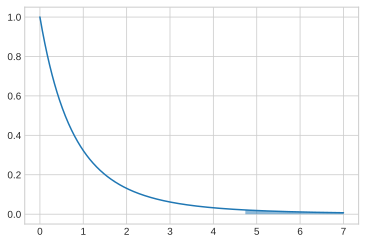

In [178]:
ox = np.linspace(0, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [179]:
R2 = 0.76342462
F = (R2 / k1) / ((1 - R2) / k2)
F

11.29443888032643

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

__Ответ__: 1


__Задача 3__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.

### Двухвыборочный t-тест

Ранее с помощью распределения Стьюдента мы научились проверять гипотезы о математическом ожидании и о коэффициенте корреляции.

Распределение Стьюдента также можно применять для следующей __задачи__. Имеются две независимые выборки $X_1$, $X_2$, взятые, соответственно, из распределений $D_1$, $D_2$. Требуется проверить гипотезу о том, что математические ожидания двух соответствующих распределений равны, т.е.
$$H_0: \: M(D_1) = M(D_2)$$

Допустим, размеры выборок равны, соответственно, $n_1$ и $n_2$. Обозначим через
$$\sigma_\Delta = \sqrt{\dfrac{\sigma_{X_1}^2}{n_1} + \dfrac{\sigma_{X_2}^2}{n_2}}$$
среднее квадратическое отклонение разности между выборочными средними выборок $X_1$ и $X_2$. Здесь $\sigma_{X_i}^2$ — несмещённая оценка дисперсии по выборке $X_i$.

Для проверки данной гипотезы используется следующая __статистика__:
$$t = \dfrac{\overline{X_1} - \overline{X_2}}{\sigma_\Delta}$$

В предположении нулевой гипотезы данная статистика имеет распределение Стьюдента. Число степеней свободы распределения определяется из следующего равенства:
$$df = \dfrac{\left( \dfrac{\sigma_{X_1}^2}{n_1} + \dfrac{\sigma_{X_2}^2}{n_2} \right)^2}{\dfrac{\left( \sigma_{X_1}^2 / n_1 \right)^2}{n_1 - 1} + \dfrac{\left( \sigma_{X_2}^2 / n_2 \right)^2}{n_2 - 1}}$$

Дальнейшая процедура проверки гипотезы стандартна: выбирается уровень значимости $\alpha$, по нему строится двухсторонняя критическая область (с использованием квантилей $t_{x, \: df}$ распределения Стьюдента) и наконец проводится статистический тест.

In [180]:
x1 = np.array([1]*77 + [0]*(2509-77))
x2 = np.array([1]*60 + [0]*(1465-60))

Итак, по порядку. В первую очередь, посчитаем значение $\sigma_\Delta$:

In [181]:
n1 = x1.size
n2 = x2.size

s1 = x1.std(ddof=1)
s2 = x2.std(ddof=1)

In [182]:
s_delta = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)
s_delta

0.006220171278295827

Отсюда получаем значение статистики:

In [183]:
t = (x1.mean() - x2.mean()) / s_delta

t

-1.6504551408398205

Зафиксируем уровень значимости  α=0.05 . Теперь нужно посчитать квантили распределения Стьюдента. Посчитаем число степеней свободы этого распределения:

In [184]:
df = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2 / \
    ((s1 ** 2 / n1) ** 2 / (n1 - 1) + (s2 ** 2 / n2) ** 2 / (n2 - 1))

df

2732.8025644352133

Теперь квантили:

In [185]:
alpha = 0.05

t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)

t1, t2

(-1.9608324352746576, 1.9608324352746571)

Итак, критическая область имеет вид:
$$\Omega_\alpha = (-\infty, -1.96) \cup (1.96, \infty)$$

Значение не выходит за критическую область, следовательно H0 - принимается. Конверсия не является значимой.

Для двухвыборочного t-теста существует готовая реализация `scipy.stats.ttest_ind`. В неё нужно подать поочерёдно каждую из выборок. Кроме того, если нет причин считать, что дисперсии распределений двух выборок равны, надо также указать аргумент `equal_var=False`.

Как обычно, данная функция возвращает значение статистики и P-значение теста.

In [186]:
stats.ttest_ind(x1, x2, equal_var=False)


Ttest_indResult(statistic=-1.6504551408398205, pvalue=0.09896479217925898)

Ответ: 0
